# Cognitive Neuroscience: Group Project

## Final Group Project Code Instructions

Marijn van Wingerden, Department of Cognitive Science and Artificial Intelligence – Tilburg University Academic Year 2020-2021

In this Jupyter Notebook, you will find the programmatic instructions to complete the Group Project. 

You will analyse a subset of the trials and conditions from the RITA dataset, as introduced by dr. Roncaglia in the second week of class. Your time-resolved analysis, using the FFT and baseline averaging, will be performed across ALL subjects in a group (Monolinguals, Early Learners, Late Learners) in the dataset, and look for oscillatory activity in relation to the onset of the **critical item** in each sentence (the auxilary verb).

You will inspect activity in the following frequency bands:
- Delta (1-4 Hz)
- Theta (4-8 Hz)
- Alpha (8-12 Hz)
- Beta (15-25 Hz)
- low Gamma (30-60 Hz)
- high Gamma (60-100 Hz)
(different cutoffs points can be found in the literature, we are sticking with these for convenience)

All relevant methods have been covered in Worksheets 1-7, with the exception of loading multiple datafiles. Whenever a new method/function is introduced here, it will come with an example.


## Datafiles - assignment per group

Each group will analyze one set of filler sentences (NA: Non-Ambiguous sentences) and a set of experimental sentences (AM: Ambiguous sentences). The conditions in the dataset are split over groups in the following way:

- SF: subject-first
- OF: object-first
- IR: irregular rhythm
- RR: regular rhythm

- Monolinguals: RM
    - Groups 01 + 02: SFIR triggers XX1 and XX5
    - Groups 03 + 04: SFRR triggers XX2 and XX6
    - Groups 05 + 06: OFIR triggers XX3 and XX7
    - Groups 07 + 08: OFRR triggers XX4 and XX8
- Early Learners: RB
    - Groups 09 + 10: SFIR triggers XX1 and XX5
    - Groups 11 + 12: SFRR triggers XX2 and XX6
    - Groups 13 + 14: OFIR triggers XX3 and XX7
    - Groups 15 + 16: OFRR triggers XX4 and XX8
- Late Learners: RL
    - Groups 17 + 18: SFIR triggers XX1 and XX5
    - Groups 19 + 20: SFRR triggers XX2 and XX6
    - Groups 21 + 22: OFIR triggers XX3 and XX7
    - Groups 23 + 24: OFRR triggers XX4 and XX8

- Odd groups:
analyse the odd trials in the dataset
- Even groups:
analyse the even trials in the dataset

You can download the datafiles from: https://surfdrive.surf.nl/files/index.php/s/JcA9speED020q4p


## Handing in of your code

You can adapt this script template and hand it in as the code component of your Group Assignment Report.

Whenever you are asked to make a plot, it should be completed with a meaningful plot title, xlabel and ylabel texts. Figures are started with a Matplotlib figure handle: "fig_Q2A, ax = plt.subplots;". This indicates that a link (called handle) to your figure will be saved in the variable, so we can easily check it when checking your scripts. Whenever a naming convention for a variable is given, use it, because it will allow semi-automatic grading of your project script.

### Intermediate hand-in

You will be able to hand in a script/notebook with your solutions to Q1-3 after the midterms, and the correct solution will be discussed in class to give you some feedback on how the Group Project is evaluated. Groups that do not hand in their solutions to Q1-3 will receive half of the total points available for these questions by default. 

## Group members:

Please list the contributors and their U-numbers here in comments:

- Emil Anker Wiik
- Gordon Arscott
- Nina Ella Gjessing
- Louis Dowden
- Babette Scheepers

## Setting up: list your modules to import
For loading/saving puroposes, we will make use of the **os** package.
An example worksheet with instructions on how to use the os package will be provided

In [1]:
#%matplotlib inline

import numpy as np
import os

#The OS module in Python provides functions for interacting with the operating system.
#OS comes under Python's standard utility modules.
#This module provides a portable way of using operating system-dependent functionality.
#The *os* and *os. path* modules include many functions to interact with the file system

#os.getcwd() #check the directory
#os.mkdir("C:\MyPythonProject") #create a directory
#os.chdir("C:\MyPythonProject") #change the directory
#os.listdir("c:\python37") #returns list of files in the directory

#os.path.join() method in Python join one or more path components intelligently.
#This method concatenates various path components with exactly one directory separator (‘/’)
#following each non-empty part except the last path component.
#If the last path component to be joined is empty then a directory seperator (‘/’) is put at the end.

## Data loading
We will need to load the datafiles from all participants and add them all together so that we end up with a matrix that has nChannels x nTime x nParticipants (instead of trials). You can make your work easier by organising the datafiles in such a way that you put the control.npy files in their own subdirectory, and the experimental.npy files as well. 

In order to load the files, we can use the os package.

Adapt the following so that it works on your machine:

In [2]:
path_control = "./group_12_control"
path_experimental = "./group_12_experimental"

control_files = os.listdir(path_control)
experimental_files = os.listdir(path_experimental)

# check that the length of your files list matches the provided datafiles, and contains only .npy datafiles

if len(control_files) and len(experimental_files) == 22:
    print(True)

os.listdir(path_control), os.listdir(path_experimental)

True


(['group_12_part_01_control.npy',
  'group_12_part_02_control.npy',
  'group_12_part_03_control.npy',
  'group_12_part_04_control.npy',
  'group_12_part_05_control.npy',
  'group_12_part_06_control.npy',
  'group_12_part_07_control.npy',
  'group_12_part_08_control.npy',
  'group_12_part_09_control.npy',
  'group_12_part_10_control.npy',
  'group_12_part_11_control.npy',
  'group_12_part_12_control.npy',
  'group_12_part_13_control.npy',
  'group_12_part_14_control.npy',
  'group_12_part_15_control.npy',
  'group_12_part_16_control.npy',
  'group_12_part_17_control.npy',
  'group_12_part_18_control.npy',
  'group_12_part_19_control.npy',
  'group_12_part_20_control.npy',
  'group_12_part_21_control.npy',
  'group_12_part_22_control.npy'],
 ['group_12_part_01_experimental.npy',
  'group_12_part_02_experimental.npy',
  'group_12_part_03_experimental.npy',
  'group_12_part_04_experimental.npy',
  'group_12_part_05_experimental.npy',
  'group_12_part_06_experimental.npy',
  'group_12_part_

## Combining data and matrix pre-allocation
next, you will need to load these files one by one and extract the data for this participant. 
The data in the NumPy arrays are stored as Trials x Channels x Time. To aggregate across participants, you will thus need to add a 4th dimension to store the data.

To be able to adequately pre-allocate the data from the different subjects, we will load one trial subject manually to have a look at the shape/dimensionality of the data:

In [3]:
EEG = np.load(os.path.join(path_control,control_files[0]))
              
# control_files is a list of strings, so indexing its first element returns a string
# in this case, we are loading the first entry of control_files, i.e. participant 1

# verify that the number of trials equals 22, 
# verify that the number of channels equals 64 or 65 
# and verify that there are 751 samples per trace

np.shape(EEG)
#(Trials, Channels, Time)


(22, 64, 751)

## Q1 - setting up the data structure and loading data from all participants

The EEG data is currently stored as a 3-dimensional NumPy array. But to run our time-frequency analysis, we need some more information like the sampling rate and the time axis that corresponds to the stimulus-locked analysis window. In order to set up (=pre-allocate) a matrix that will hold all traces for all participants, we need to know the sizes of the dimensions of this 4-dimensional matrix, and fill up this matrix by looping over participants:

In [4]:
#Both of these parts are important
control = np.load(os.path.join(path_control,control_files[0]))
control = control[:,0:58]                
# control_files is a list of strings, so indexing its first element returns a string
# in this case, we are loading the first entry of control_files, i.e. participant 1

# verify that the number of trials equals 22, 
# verify that the number of channels equals 64 or 65 
# and verify that there are 751 samples per trace

np.shape(control)
#print(EEG)

(22, 58, 751)

In [25]:
#Here is my code that works kinda.

# There are 64 or 65 channels in the dataset. Only channels up to channel 59 are EEG channels
# the remaining channels are EMG and EOG channels that we will ignore in this analysis
# subset your EEG array so that only the EEG channels remain


def participantapplier(participant):
    EEG = np.load(os.path.join(path_control,control_files[participant]))
    EEG = EEG[:,0:58]
    return[EEG]

# Define nTrials, nChan, nSamples and nPart. Then, pre-allocate a matrix
# named comb_data, filled with zeros and with size nTrials, nChans x nSamples x nParticipants
EEG = control
Trials = EEG[:]
nTrials = len(Trials)
print(nTrials)
Chans = EEG[0]
nChans = len(Chans) # number of channels
print(nChans)
nSamples = EEG.shape[2]
#nSamples = (len(Samples))
#print(Samples)
Parts = control_files
nParts = len(Parts)
print(nParts)
comb_data = np.zeros((nTrials, nChans, nSamples, nParts))
np.shape(comb_data)

# next, we need to loop over all participant datafiles and add them to the appropriate slice in your 4-D array
# For this, you need to use specific array indexing to indicate where in comb_data each participant's data
# needs to go. You can and should reuse the data-reading code above.

# loop over participants, and wihtin each iteration of the loop, load the
# next datafile and fill comb_data with the EEG traces (nTrials x nChans x nSamples)

#for index, x in enumerate(Parts):
    #datP = participantapplier(index)
    #np.shape(datP)
    #fuckt = datP[:]
    #fuckc = datP[0]
    #fuckt2 = fuckc[0]
    #fuckc3 = fuckt2[0]
    #chans = datP[0]
    #fucker = datP[index:]
    #fucker[index:] = chans
    
    #comb_data[] = index:fuckc3,fuckt2,fuckc
#np.shape(fuckc3)
#np.shape(fucker)
#np.shape(comb_data)
    
        
#for index, x in enumerate(Parts):
    #datP = participantapplier(index)[0]
    #np.shape(datP)
    #chans = datP[0]
    #fucker = datP[index:]
    #fucker[index:] = chans
   #comb_data[x::] = datP
#np.shape(datP)
#np.shape(fucker)
#np.shape(comb_data)

for index, x in enumerate(Parts):
    datP = participantapplier(index)
    np.shape(datP)
    chans = datP[0]
    chans = np.expand_dims(chans, axis=3)
    comb_data = comb_data[:] + chans
#np.shape(datP)
#np.shape(fucker)
np.shape(comb_data)



#for x in range(nParts):
    #comb_data[x] = participantapplier(x)
    
# caution - multiple lines of code might be needed

22
58
22


(22, 58, 751, 22)

## Q2 - explore the data

Let's explore this newly combined dataset a little bit. This sections fo EEG traces in your dataset have been taken with a [-0.5s, 1s] window aroun the relevant event. What's more, each trace has been averaged to its baseline period, so that the mean amplitude should be 0 (with some rounding error). 

To verify, first, determine the mean for the time period of -0.5 to 0 seconds. Given that the srate = 500 Hz, the baseline period corresponds to the first 250 samples
- subset your combined data to only the first 250 samples
- select a random participant and sunset the data further to only this participant
- select a random EEG channel and subset the data further to only this channel

This should leave you with a nTrials x 250 (samples) matrix. Create a similar evoked matrix with the remainder of the samples. With these matrices:
- plot the traces for all trials in the **baseline** matrix (use transpose if necessary). 
- calculate the mean for each trace:
    - once for the baseline period
    - once for the remainder of the trial
- plot these values (N= nTrials, check) in a histogram, each in their own subplot

Refer to Worksheet 1 for example uses of **np.mean**. np.std works in a similar way

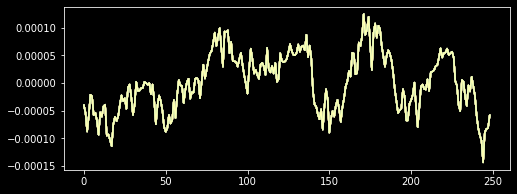

In [123]:
#Note to self. The stuff above is worded horribly, remember when explaining this shit
#That half of it is backwards and topsy turvy
plt.style.use('dark_background')
import matplotlib.pyplot as plt
from random import randint

def Chopper(Dataset,STrials,ETrials):
    #ETrials -= 1
    #STrials -= 1
    baseline_period = Dataset[:,:,STrials:ETrials] #THIS IS GENERATING SEPERATE CHANNELS
    RpartGenerator = randint(0,nParts-1)           #FIX THIS LATER ON!
    RpartData = baseline_period[RpartGenerator]
    RchanGenerator = randint(0,57)
    RchanData = RpartData[RchanGenerator]
    return(RchanData)
    
BaselinePeriodtest = Chopper(comb_data,0,249)
np.shape(BaselinePeriodtest)
RemainderPeriodTest = Chopper(comb_data,250,750)
np.shape(RemainderPeriodTest)

#traces = BaselinePeriodtest[0:,21][0]
#trials = BaselinePeriodtest[0,:][0]
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(BaselinePeriodtest)
plt.show()
baseline_mean = np.nanmean(BaselinePeriodtest,axis = 1); 
evoked_mean = np.nanmean(RemainderPeriodTest,axis = 1); 

#np.shape(RpartData)
#baseline_mean = 
#evoked_mean = ...



Text(0, 0.5, 'count')

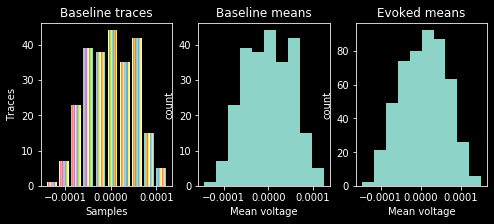

In [124]:
# now plot these three histograms using the subplot given
fig_Q2A, ax = plt.subplots(figsize=(8,3), nrows=1, ncols=3) # 1x3 graph

# plot the traces in ax[0]
ax[0].hist(BaselinePeriodtest)
plt.axes(ax[0])
plt.title("Baseline traces")
ax[0].set_xlabel('Samples')
ax[0].set_ylabel('Traces')

# plot the baseline mean in ax[1] with this code
ax[1].hist(baseline_mean)
plt.axes(ax[1])
plt.title('Baseline means')
ax[1].set_xlabel('Mean voltage')
ax[1].set_ylabel('count')

# plot the evoked mean in ax[2] with this code
ax[2].hist(evoked_mean)
plt.axes(ax[2])
plt.title('Evoked means')
ax[2].set_xlabel('Mean voltage')
ax[2].set_ylabel('count')



Looking at theses histograms, you should see that the distribution of evoked mean values can vary: while EEG recordings are referenced to a common ground, and usualy then re-referenced to the global average, we are dealing here with specific cutouts of EEG traces around specific events in the dataset. The data has been normalised to the baseline window for each trial, but the mean of the evoked part is not controlled. In addition, there might be differences in the size of the amplitudes between channels and between participants due to differences in conductivity.

Illustrate that this global averaging does not guarantee equal variance. Reuse the baseline and evoked subsets:
- Compute, instead of the mean across samples, the standard deviation (numpy.std or variants)
- calculate the mean for each trace:
    - once for the baseline period
    - once for the remainder of the trial
- Adapt the plotting code for Q2A and plot these distributions of standard deviations in figure Q2B.

Text(0, 0.5, 'Traces')

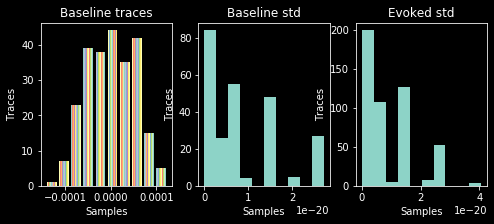

In [330]:
baseline_std = np.std(BaselinePeriodtest, axis = 1) #I need to come back and fix this in a bit
evoked_std = np.std(RemainderPeriodTest, axis = 1)

fig_Q2B, ax = plt.subplots(figsize=(8,3), nrows=1, ncols=3) # don't forget proper plot annotation


# plot the traces in ax[0]
ax[0].hist(BaselinePeriodtest)
plt.axes(ax[0])
plt.title("Baseline traces")
ax[0].set_xlabel('Samples')
ax[0].set_ylabel('Traces')

# plot the baseline mean in ax[1] with this code
ax[1].hist(baseline_std)
plt.axes(ax[1])
plt.title('Baseline std')
ax[1].set_xlabel('Samples')
ax[1].set_ylabel('Traces')


# plot the evoked mean in ax[2] with this code
ax[2].hist(evoked_std)
plt.axes(ax[2])
plt.title('Evoked std')
ax[2].set_xlabel('Samples')
ax[2].set_ylabel('Traces')




## Q3 - normalizing the data

So, if there are large differences in mean and/or standard deviation between channels or participants, we can implement some standard scaling. First, let think about why this "standard scaling" (substracting the mean, dividing by std) is important? You will be combining data from different participants for these exercises. They have been possibly recorded at different days, with different gels or electrodes, and thus with different conductivity between participants. We will assume that the recording across videos within one participant remains stable. So, in order to compare and average the recordings from different participants "fairly", we want them to be on more or less the same scale.

We can thus attempt to normalize the signal per participant, by dividing all data per participant by its standard deviation. Let's show the extent of the problem by plotting the participants with the lowest and highest std side by side. Re-create your matrix of std values for the evoked period, but:
- do not subset one participant, but retain all participants (still only selecting 1 channel)
- average the std values for each trace over trials, save in part_std (you will retain one value per participant)
- use np.argmax (and variants) to create two indexes, min_std and max_std that point to the participants with the lowest and highest standard deviations
- calculate and plot the average over trials for these two participants, using different line colors and proper line labeling. 
    - Plot them in the first subplot of a 1x2 subplot
- Observe the scaling difference



In [367]:
#Note to self, thing i did earlier but like now.
#Okay the way i am going to do this means that you are going to get fucked results unless you
#Run everything in sequanece.
#Basically above we are selecting a basis to compare, and doing so we select a random channel.
#Here i am going to compare to the same channel, but if you generate randomly above
#Then try look here it will be weird, so just remembr to do this stuff in sequence!
#nVM MIGHT BE FINE

def Chopper2(Dataset,STrials,ETrials):
    #ETrials -= 1
    #STrials -= 1
    baseline_period = Dataset[:,:,STrials:ETrials]
    RchanGenerator = randint(0,57)
    RchanData = baseline_period[:,RchanGenerator,:,]
    return(RchanData,baseline_period)

#my_array[0,:,:]

baseline_temp, blp = Chopper2(comb_data,0,249)
evoked_temp, evp = Chopper2(comb_data,250,750)

#Okay so here i need to cycle through all of the partcipants, to get the std and store
#seperately. OBSOLETE IDEA 


part_std = baseline_temp
#newvar = np.std(part_std, axis = 0)
baselinenew_mean = np.nanmean(part_std,axis = 1);
newtester = np.std(baselinenew_mean, axis = 1)
part_std = newtester
print(part_std)
np.shape(part_std)

 # don't forget proper plot annotation

[1.65436123e-24 1.05879118e-22 1.05879118e-22 2.11758237e-22
 8.27180613e-25 0.00000000e+00 2.64697796e-23 0.00000000e+00
 0.00000000e+00 2.64697796e-23 1.05879118e-22 5.29395592e-23
 3.30872245e-24 1.05879118e-22 1.98523347e-23 5.29395592e-23
 0.00000000e+00 2.64697796e-23 1.58818678e-22 0.00000000e+00
 2.11758237e-22 1.05879118e-22]


(22,)

[1.65436123e-24 1.05879118e-22 1.05879118e-22 2.11758237e-22
 8.27180613e-25 0.00000000e+00 2.64697796e-23 0.00000000e+00
 0.00000000e+00 2.64697796e-23 1.05879118e-22 5.29395592e-23
 3.30872245e-24 1.05879118e-22 1.98523347e-23 5.29395592e-23
 0.00000000e+00 2.64697796e-23 1.58818678e-22 0.00000000e+00
 2.11758237e-22 1.05879118e-22]
5
3


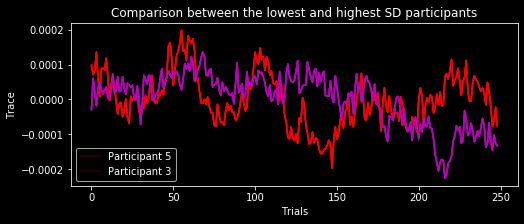

In [406]:
#Okay when you come back to this remember that you are doign the mean over the trials
#you got trials and samples mixed up atm
#It's basically fine we can just transpose it in.
part_std = newtester
print(part_std)
min_std = np.argmin(part_std)
max_std = np.argmax(part_std)

print(min_std)
print(max_std)

minimummean = baseline_temp[min_std,] #Okay here i need to fire back in all the smaples again.
maximummean = baseline_temp[max_std,]
minimummean2 = np.nanmean(minimummean,axis = 1); 
#maximummean = np.nanmean(maximummean,axis = 1); 

np.shape(minimummean2)
fig_Q3, ax = plt.subplots(figsize=(8,3)) # don't forget proper plot annotation
ax.plot(minimummean ,'r', alpha = 0.2)
ax.plot(maximummean, 'm', alpha = 0.2)
plt.title("Comparison between the lowest and highest SD participants") #Labelling the garbage just like rpint basically
ax.set_ylabel('Trace')
ax.set_xlabel('Trials')
ax.legend(["Participant {}".format(min_std), "Participant {}".format(max_std)])
plt.show()

In [10]:

"""
fig_Q3, ax = plt.subplots(figsize=(8,3)) # don't forget proper plot annotation
ax.plot(minimummean[])
ax.plot(maximummean)
plt.title("Comparison between the lowest and highest SD participants") #Labelling the garbage just like rpint basically
ax.set_ylabel('Trace')
ax.set_xlabel('Trials')
ax.legend(["Participant {}".format(min_std), "Participant {}".format(max_std)])
plt.show()
"""




#fig_Q3, ax = plt.subplots(figsize=(8,3)) # don't forget proper plot annotation
#ax.plot(minimummean)
#ax.plot(maximummean)
#plt.title("Comparison between the lowest and highest SD participants") #Labelling the garbage just like rpint basically
#ax.set_ylabel('Trace')
#ax.set_xlabel('Trials')
#ax.legend(["Participant {}".format(min_std), "Participant {}".format(max_std)])
#plt.show()

<class 'numpy.ndarray'>


AttributeError: 'numpy.ndarray' object has no attribute 'append'

Next, we want to use the standard deviation for each channel to normalize (i.e. divide) the data by this value. 
- Re-use the standard deviation per participants calculated above
- Normalize the evoked matrix (per participant) by the participant std (save as evoked_norm)
- plot the **normalized** average over trials for these two participants, using different line colors and proper line labeling. 
    - Plot them in the second subplot of fig Q3
    - The data should now be more or less on the same scale

In [ ]:
##
## your code here
##

evoked_norm = ...

We now have to apply this normalization across all channels. The fairest way is to calculate the grand standard deviation per participant (over all their channels, so the relative scaling between channels remains intact). This will normalize the range of the signal within one participants, so that they will be comparable between participants.

In order to do this: 
- first preallocate a normalized matrix with the same size as comb_data, called comb_data_norm.
- Next, create a loop to go over Participants, and inside the loop:
    - calculate the grand standard deviation per participant 
    - normalization all values by this grand standard deviation
        - Examine the numpy.std documentation to get a single std value across a 3D matrix
- Then, recreate the plot with the trial averages as made for the first subplot of fig_Q2
    - It should now rather resemble the normalized plot as made in the second subplot
- Save this figure as Figure1



In [ ]:
##
## your code here
##

comb_data_norm = ...

for 
    ..
end


fig_Q3, ax = plt.subplots(figsize=(8,3), ...) # 1x1 fig, don't forget proper plot annotation
...

# save Figure Q3C as your Figure 1 for your report
Figure1 = fig_Q3;

In [6]:
#Here is just gonna be the backups for deleted bits of code

In [10]:
""" #Just commented this out for the time being but left it incase it's useful for insight
# There are 64 or 65 channels in the dataset. Only channels up to channel 59 are EEG channels
# the remaining channels are EMG and EOG channels that we will ignore in this analysis
# subset your EEG array so that only the EEG channels remain

EEG = EEG[:, 0:59]
np.shape(EEG)

# Define nTrials, nChan, nSamples and nPart. Then, pre-allocate a matrix
# named comb_data, filled with zeros and with size nTrials, nChans x nSamples x nParticipants

nTrials = 22
nChans = 59 # number of channels
nSamples = 751 #time samples?
nParts = 22 # number of participants

comb_data = np.zeros((nTrials, nChans, nSamples, nParts))
np.shape(comb_data)

# next, we need to loop over all participant datafiles and add them to the appropriate slice in your 4-D array
# For this, you need to use specific array indexing to indicate where in comb_data each participant's data
# needs to go. You can and should reuse the data-reading code above.

# loop over participants, and wihtin each iteration of the loop, load the
# next datafile and fill comb_data with the EEG traces (nTrials x nChans x nSamples)

print(type(comb_data))

for each_participant in range(nParts):
    EEG = np.load(os.path.join(path_control,control_files[each_participant]))   
    comb_data.append[EEG]
    ... # caution - multiple lines of code might be needed

    
#EXAMPLE FROM LECTURE 1 FOR FILLING IN ZERO MATRIX IN 2D
    
#freq_mat = np.zeros((3,1000))

#freqs = np.array([2,5,7])
#thetas = np.array([0.5, 1, 1.5])*np.pi

#for iMat in range(freq_mat.shape[0]):
#    freq_mat[iMat,:] = np.sin(2*np.pi*freqs[iMat]*time + thetas[iMat])
"""

<class 'numpy.ndarray'>


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [10]:
""" SORTA USELESS


#Okay the way i am going to do this means that you are going to get fucked results unless you
#Run everything in sequanece.
#Basically above we are selecting a basis to compare, and doing so we select a random channel.
#Here i am going to compare to the same channel, but if you generate randomly above
#Then try look here it will be weird, so just remembr to do this stuff in sequence!
#nVM MIGHT BE FINE

def Chopper2(Dataset,STrials,ETrials):
    #ETrials -= 1
    #STrials -= 1
    baseline_period = Dataset[:,:,STrials:ETrials]
    RchanGenerator = randint(0,57)
    RchanData = RpartData[RchanGenerator]
    return(RchanData)



baseline_temp = Chopper2(comb_data,0,249)
evoked_temp = Chopper2(comb_data,0,249)


baseline_std = np.std(baseline_temp)
evoked_std = np.std(RemainderPeriodTest, axis = 1)

fig_Q2B, ax = plt.subplots(figsize=(8,3), nrows=1, ncols=3) # don't forget proper plot annotation
"""

<class 'numpy.ndarray'>


AttributeError: 'numpy.ndarray' object has no attribute 'append'